In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Settings for `No Limit` of `maximum columns` to be shown

In [3]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', 31)

#pd.set_option('display.max_rows', None)

In [4]:
# Limit the DataFrame to the first 1417918 rows
# df = flights.head(1417918)

In [5]:
flights = pd.read_csv(r"C:\Users\Dhiraj\Desktop\flights_sampled.csv", na_values=['-'])

# NOTE:  na_values=['-'] means,  - lai pani NaN value jastai consider garney vanera surumai vaneko

In [6]:
flights.shape

(1417918, 31)

### Things to be done in Data Exploration:

#### * Missing values       --> Look for any missing values (i.e NaN, Na, nan, None etc)
#### * Outliers             --> Look for Outliers (an outlier is a data point that differs significantly from other observations/data-points)
#### * Categorical values   --> Check if the, categorical values are consistent and have no problem with them.
#### * Binary values        --> Check if the, binary values are consistent and have no problem with them.
#### * Column types         --> To check if all the columns have correct data types
####  (for eg: if category then should have obect data type, is string/character then also object type, if number then either int64 or float64)


In [7]:
flights.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### To view all of the `columns` in dataset

In [8]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

### only keep columns that are `useful`

#### df[[ ]]  --> In pandas, double square brackets ([[ ]]) are used to pass a list of column names, and the result is a new DataFrame containing only the specified columns.

In [9]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLED', 'CANCELLATION_REASON']]

### To view the data types of all columns

In [10]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
ARRIVAL_DELAY          float64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
CANCELLED                int64
CANCELLATION_REASON     object
dtype: object

In [11]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11.0,430,408.0,205.0,194.0,-22.0,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8.0,750,741.0,280.0,279.0,-9.0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2.0,806,811.0,286.0,293.0,5.0,NaN,NaN,NaN,NaN,NaN,0,NaN
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,-5.0,805,756.0,285.0,281.0,-9.0,NaN,NaN,NaN,NaN,NaN,0,NaN
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,-1.0,320,259.0,235.0,215.0,-21.0,NaN,NaN,NaN,NaN,NaN,0,NaN


### `Data Exploration`

### To find / check / view  missing values (i.e NaN  or  None)

#### `.isna().sum()`

#### It is used to find missing values (i.e NaN or None)

In [12]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           42424
DEPARTURE_DELAY          42424
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             44450
SCHEDULED_TIME               2
ELAPSED_TIME             46784
ARRIVAL_DELAY            46784
AIR_SYSTEM_DELAY       1129544
SECURITY_DELAY         1129544
AIRLINE_DELAY          1129544
LATE_AIRCRAFT_DELAY    1129544
WEATHER_DELAY          1129544
CANCELLED                    0
CANCELLATION_REASON    1374339
dtype: int64

#### `.isnull().sum()`

### Like .isna(),  .isnull()  is also  used to find missing values (i.e NaN or None)

In [13]:
flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           42424
DEPARTURE_DELAY          42424
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             44450
SCHEDULED_TIME               2
ELAPSED_TIME             46784
ARRIVAL_DELAY            46784
AIR_SYSTEM_DELAY       1129544
SECURITY_DELAY         1129544
AIRLINE_DELAY          1129544
LATE_AIRCRAFT_DELAY    1129544
WEATHER_DELAY          1129544
CANCELLED                    0
CANCELLATION_REASON    1374339
dtype: int64

### To view `NaN` values of any columns
#### `df[df['column_name'].isna()]`

In [14]:
# flights[flights['ARRIVAL_DELAY'].isna()]
# flights[flights['AIR_SYSTEM_DELAY'].isna()]
# flights[flights['SECURITY_DELAY'].isna()]
# flights[flights['AIRLINE_DELAY'].isna()]
# flights[flights['LATE_AIRCRAFT_DELAY'].isna()]
# flights[flights['WEATHER_DELAY'].isna()]

### `Conditional checking` of `NaN` values

### checking if all types of delay are occuring at same time OR different time  ??

In [15]:
delay_na_values = flights[flights['AIR_SYSTEM_DELAY'].isna() & flights['SECURITY_DELAY'].isna() & flights['AIRLINE_DELAY'].isna() & flights['LATE_AIRCRAFT_DELAY'].isna() & flights['WEATHER_DELAY'].isna()]

delay_na_values.shape

(1129544, 23)

### Visualizing `Histograms` for better visualization of NaN values

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'FLIGHT_NUMBER'}>,
        <Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>],
       [<Axes: title={'center': 'SCHEDULED_ARRIVAL'}>,
        <Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'SCHEDULED_TIME'}>,
        <Axes: title={'center': 'ELAPSED_TIME'}>],
       [<Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>,
        <Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>],
       [<Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>, <Axes: >]], dtype=object)

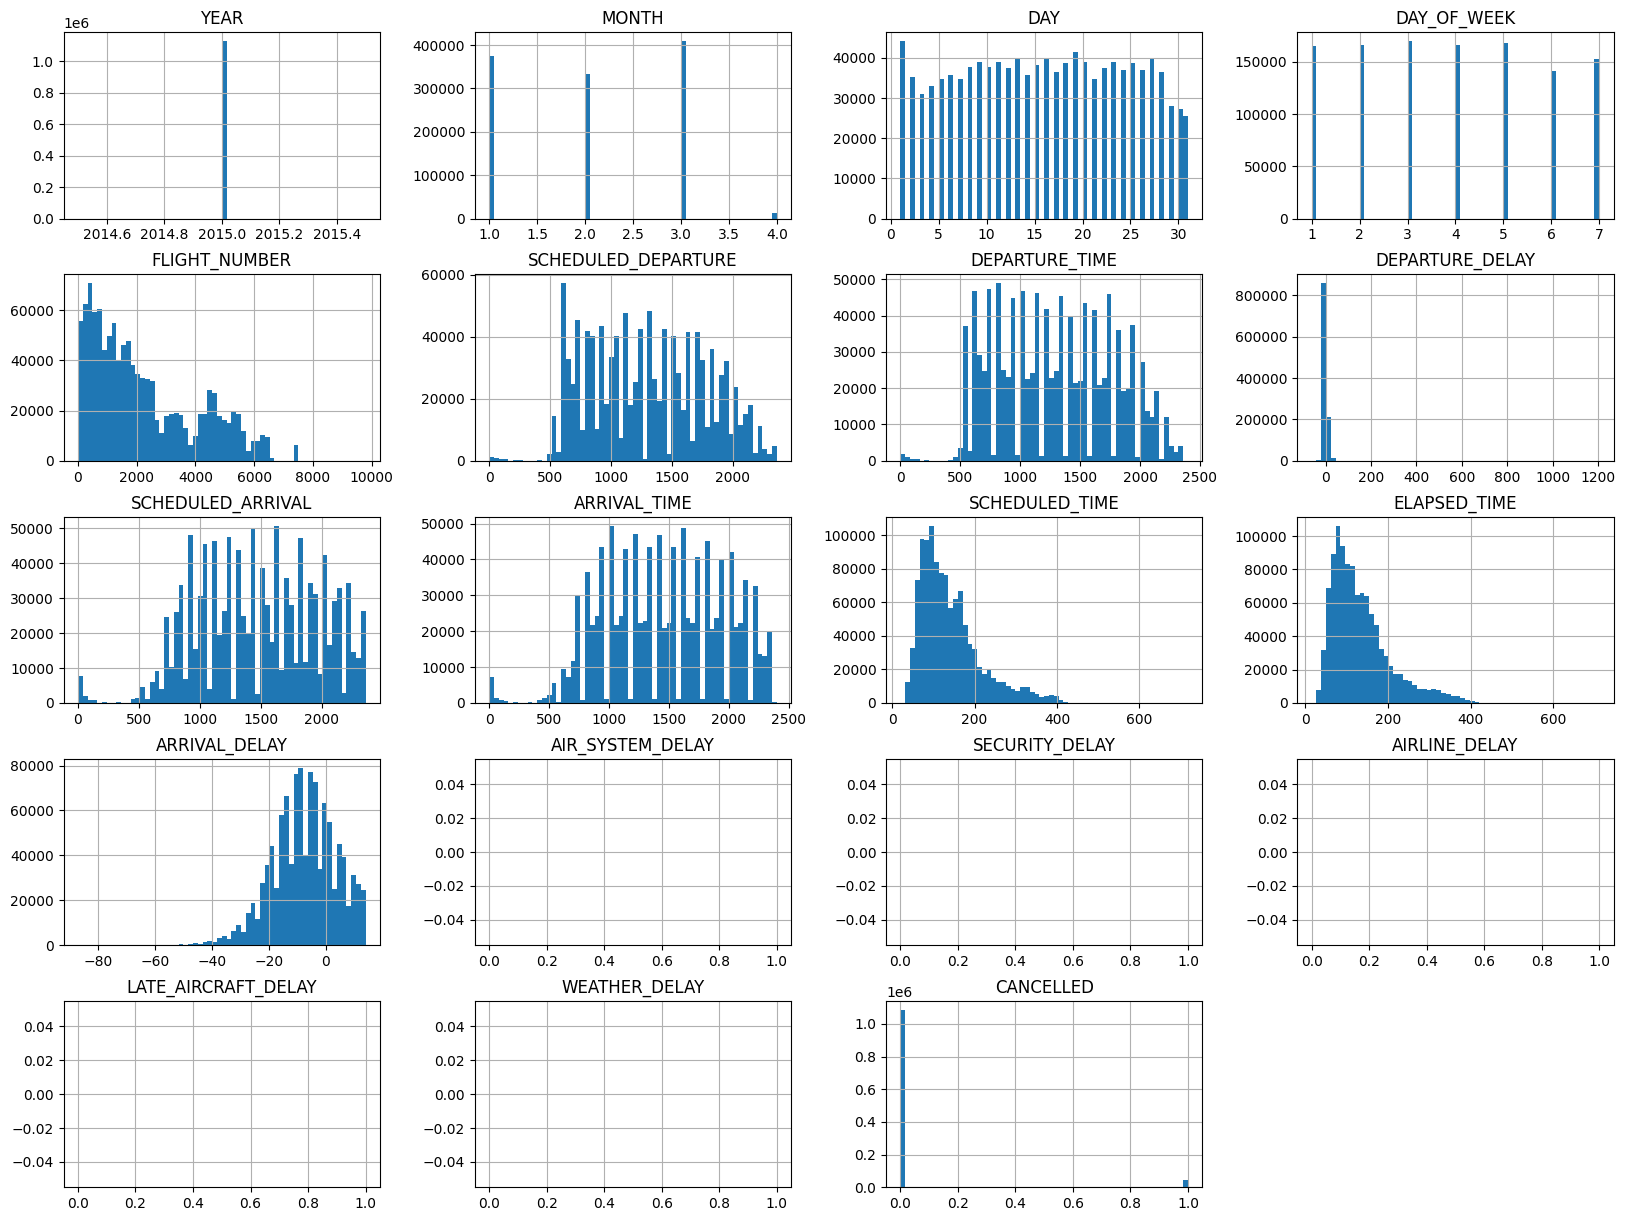

In [16]:
delay_na_values.hist(bins=60, figsize=(20,15))

### applying ` ~ ` Filtering

In [17]:
# ~ means, ignoring/neglecting that values

non_na_values  = flights[~flights['AIR_SYSTEM_DELAY'].isna()]

non_na_values.shape

(288374, 23)

In [18]:
non_na_values.isna().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME              0
DEPARTURE_DELAY             0
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME                0
SCHEDULED_TIME              0
ELAPSED_TIME                0
ARRIVAL_DELAY               0
AIR_SYSTEM_DELAY            0
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
CANCELLED                   0
CANCELLATION_REASON    288374
dtype: int64

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'FLIGHT_NUMBER'}>,
        <Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>],
       [<Axes: title={'center': 'SCHEDULED_ARRIVAL'}>,
        <Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'SCHEDULED_TIME'}>,
        <Axes: title={'center': 'ELAPSED_TIME'}>],
       [<Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>,
        <Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>],
       [<Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>, <Axes: >]], dtype=object)

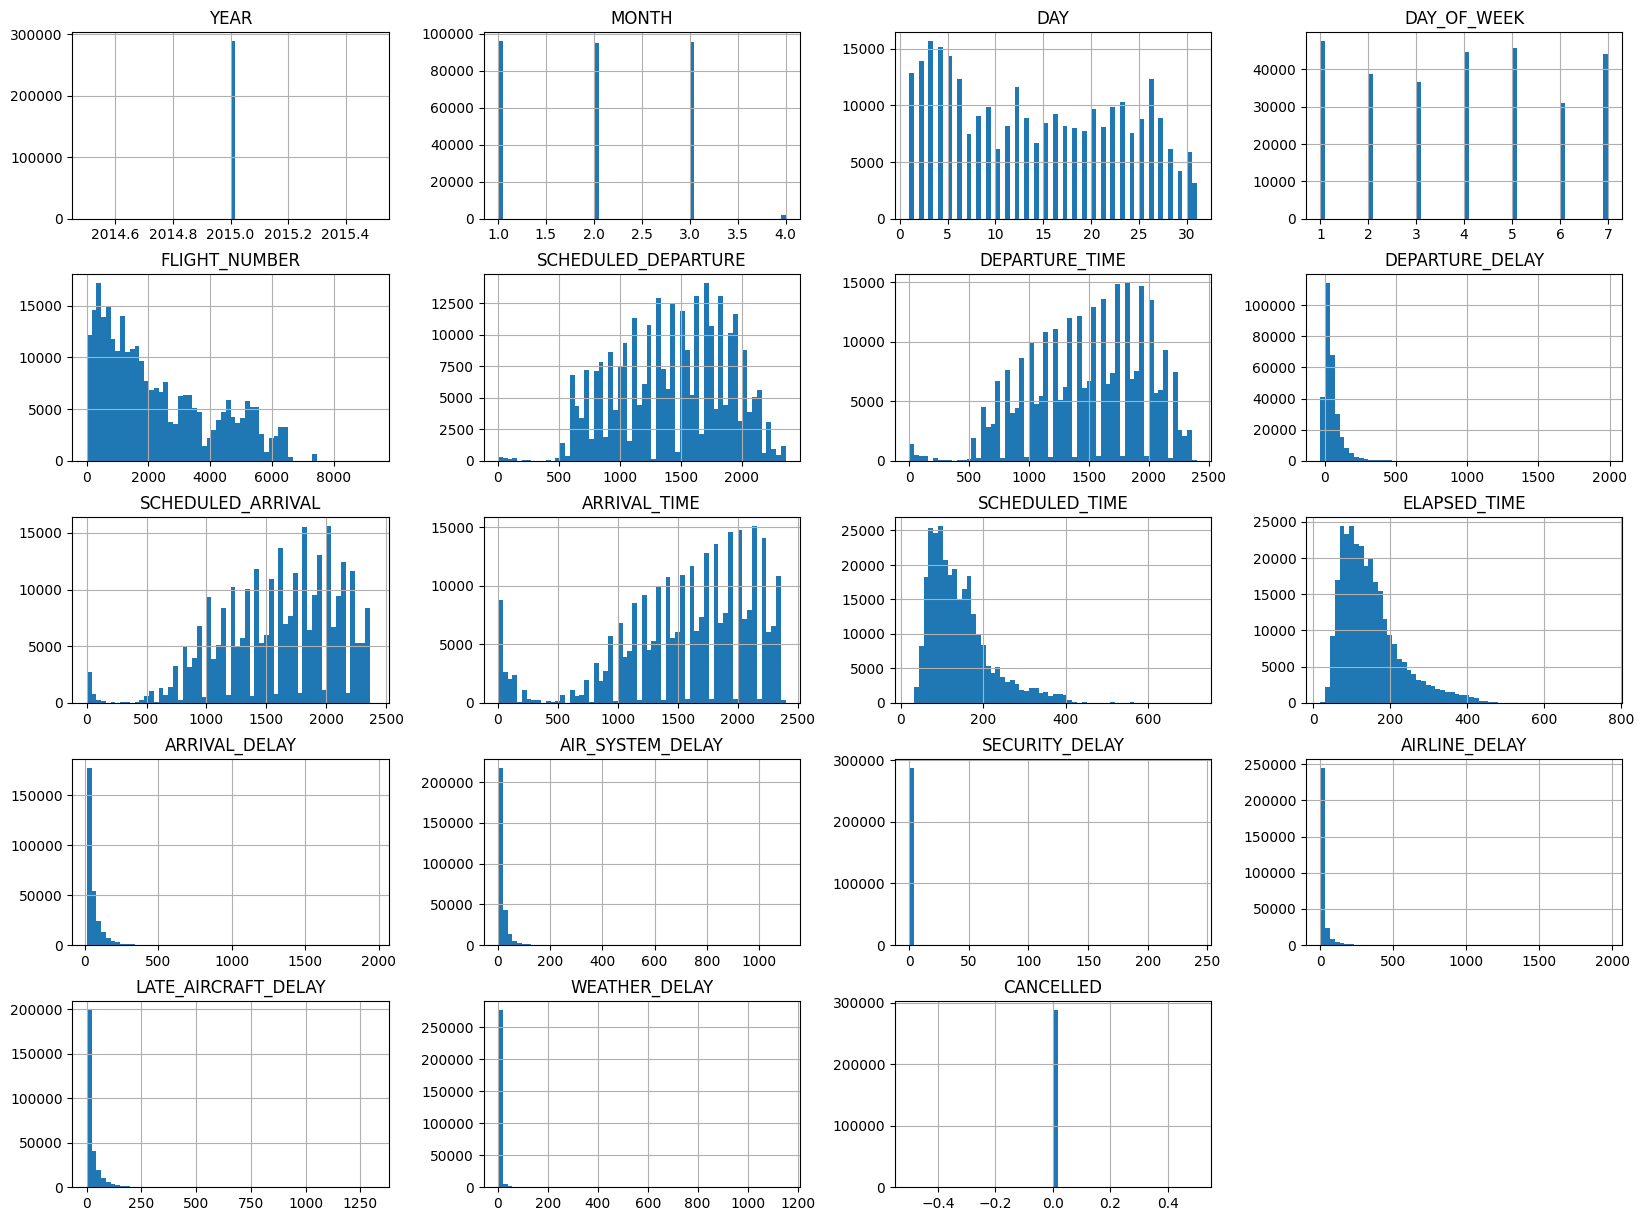

In [19]:
non_na_values.hist(bins=60, figsize=(20,15))

In [20]:
late_flights = flights[flights['ARRIVAL_DELAY'] < 15]

late_flights.shape

(1082760, 23)

In [21]:
late_flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
ARRIVAL_DELAY                0
AIR_SYSTEM_DELAY       1082760
SECURITY_DELAY         1082760
AIRLINE_DELAY          1082760
LATE_AIRCRAFT_DELAY    1082760
WEATHER_DELAY          1082760
CANCELLED                    0
CANCELLATION_REASON    1082760
dtype: int64

In [22]:
arrival_na = flights[flights['ARRIVAL_DELAY'].isna()]

arrival_na

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
32,2015,1,1,4,AS,136,ANC,SEA,135,NaN,NaN,600,NaN,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
42,2015,1,1,4,AA,2459,PHX,DFW,200,NaN,NaN,500,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
68,2015,1,1,4,OO,5254,MAF,IAH,510,NaN,NaN,637,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
82,2015,1,1,4,MQ,2859,SGF,DFW,525,NaN,NaN,700,NaN,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
90,2015,1,1,4,OO,5460,RDD,SFO,530,NaN,NaN,700,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417531,2015,4,1,3,DL,1394,DCA,MSP,1900,1919.0,19.0,2046,2341.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1417645,2015,4,1,3,EV,5037,IAD,MSP,1910,1929.0,19.0,2049,2331.0,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1417653,2015,4,1,3,OO,5242,PSP,LAX,1910,NaN,NaN,2004,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
1417751,2015,4,1,3,DL,1108,ATL,MSP,1915,1914.0,-1.0,2100,NaN,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [23]:
arrival_na['CANCELLED'].value_counts()

CANCELLED
1    43579
0     3205
Name: count, dtype: int64

In [24]:
arrival_na_not_cancelled = arrival_na[arrival_na['CANCELLED']==0]

arrival_na_not_cancelled

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
724,2015,1,1,4,DL,716,OMA,ATL,645,637.0,-8.0,1009,1451.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1455,2015,1,1,4,OO,5237,MKE,IAH,745,742.0,-3.0,1041,1505.0,176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2218,2015,1,1,4,WN,1966,ATL,JAX,845,922.0,37.0,1000,1219.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2526,2015,1,1,4,EV,4555,IAH,HRL,902,859.0,-3.0,1017,1319.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2866,2015,1,1,4,WN,1081,MDW,OKC,930,926.0,-4.0,1135,1343.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417272,2015,4,1,3,B6,1116,TPA,LGA,1849,1839.0,-10.0,2129,NaN,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1417425,2015,4,1,3,UA,685,ORD,MSP,1857,1857.0,0.0,2027,2324.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1417531,2015,4,1,3,DL,1394,DCA,MSP,1900,1919.0,19.0,2046,2341.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1417645,2015,4,1,3,EV,5037,IAD,MSP,1910,1929.0,19.0,2049,2331.0,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


#### We can calculate the arrival_delay but we do not know what the reason for the delay is. The missing information is only 2%.

In [25]:
arrival_na_not_cancelled[arrival_na_not_cancelled['ARRIVAL_TIME'].isna()].shape

(871, 23)

### `Data Cleaning`

### As you do Exploration, note down what steps/actions to take for `Data Cleaning`

##### 1. Remove rows where the arrival delay is missing (most of them are cancelled flights)
##### 2. Fill in nan values for delay reasons with zeros

In [26]:
flights.shape

(1417918, 23)

In [27]:
flights = flights[~flights['ARRIVAL_DELAY'].isna()]

flights.shape

(1371134, 23)

In [28]:
flights[flights['SCHEDULED_TIME'].isna()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON


In [29]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
ARRIVAL_DELAY                0
AIR_SYSTEM_DELAY       1082760
SECURITY_DELAY         1082760
AIRLINE_DELAY          1082760
LATE_AIRCRAFT_DELAY    1082760
WEATHER_DELAY          1082760
CANCELLED                    0
CANCELLATION_REASON    1371134
dtype: int64

In [30]:
flights = flights.fillna(0)

In [31]:
flights.isna().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
SCHEDULED_TIME         0
ELAPSED_TIME           0
ARRIVAL_DELAY          0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
CANCELLED              0
CANCELLATION_REASON    0
dtype: int64

In [32]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
ARRIVAL_DELAY          float64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
CANCELLED                int64
CANCELLATION_REASON      int64
dtype: object

###### Sometimes there are problems with the data we might not see. One way to figure it out is to look at the types of the columns. If we know a column should be float but it is specific as object (aka string), it is an indication that there is something wrong with it.

### Only keeping the columns that are useful for analysis

In [33]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_ARRIVAL', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

# flights.head(10)

In [34]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
SCHEDULED_ARRIVAL        int64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

### Get better understanding of `Categorical data  (i.e 'object' type of data)`

In [35]:
flights['AIRLINE'].value_counts()

AIRLINE
WN    294553
DL    198368
EV    143559
OO    139968
AA    126028
UA    116661
US     95587
MQ     77400
B6     61501
AS     39762
NK     25939
F9     19508
HA     18658
VX     13642
Name: count, dtype: int64

<Axes: xlabel='AIRLINE'>

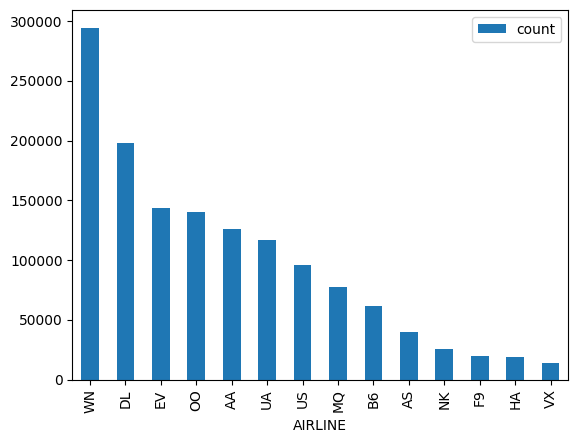

In [36]:
pd.DataFrame(flights.value_counts("AIRLINE")).plot(kind='bar')